# Project - Predict the hourly rain gauge total
This is a time series prediction task: you are given snapshots of polarimetric radar values and asked to predict the hourly rain gauge total.

First, login to Kaggle and download the dataset.
https://www.kaggle.com/c/how-much-did-it-rain-ii/data

Now you need to use an LSTM model to predict the hourly rain gauge total.

# Data description

To understand the data, you have to realize that there are multiple radar observations over the course of an hour, and only one gauge observation (the 'Expected'). That is why there are multiple rows with the same 'Id'.

The columns in the datasets are:

Id: A unique number for the set of observations over an hour at a gauge.

minutes_past: For each set of radar observations, the minutes past the top of the hour that the radar observations were carried out. Radar observations are snapshots at that point in time.

radardist_km: Distance of gauge from the radar whose observations are being reported.

Ref: Radar reflectivity in km

Ref_5x5_10th: 10th percentile of reflectivity values in 5x5 neighborhood around the gauge.

Ref_5x5_50th: 50th percentile

Ref_5x5_90th: 90th percentile

RefComposite: Maximum reflectivity in the vertical column above gauge. In dBZ.

RefComposite_5x5_10th

RefComposite_5x5_50th

RefComposite_5x5_90th

RhoHV: Correlation coefficient (unitless)

RhoHV_5x5_10th

RhoHV_5x5_50th

RhoHV_5x5_90th

Zdr: Differential reflectivity in dB

Zdr_5x5_10th

Zdr_5x5_50th

Zdr_5x5_90th

Kdp: Specific differential phase (deg/km)

Kdp_5x5_10th

Kdp_5x5_50th

Kdp_5x5_90th

Expected: Actual gauge observation in mm at the end of the hour.

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [68]:
# Type declairation to minimize RAM consumption
col_list = ['minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th', 'Expected']
d = {c : np.float32 for c in col_list}
#train = pd.read_csv("../input/how-much-did-it-rain-ii/train.zip", dtype=d)

In [3]:
train = pd.read_csv("/home/gauravkai018352/cloudxlab_jupyter_notebooks/train.zip")

In [4]:
train.shape[0]/3

4588400.333333333

In [6]:
df = train.iloc[:4588400,]

In [7]:
df

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588395,393730,52,10.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,...,1.051667,NaN,NaN,NaN,1.1250,NaN,NaN,NaN,NaN,12.950007
4588396,393730,57,10.0,NaN,NaN,NaN,12.5,NaN,NaN,NaN,...,1.008333,NaN,NaN,NaN,0.5625,NaN,NaN,NaN,1.759994,12.950007
4588397,393731,1,17.0,21.5,NaN,19.5,28.0,21.5,NaN,19.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.446007
4588398,393731,5,17.0,31.0,25.0,28.5,33.0,31.0,25.0,28.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.446007


In [8]:
df.to_csv('rain1.csv')

In [2]:
train = pd.read_csv("rain.csv")

In [3]:
train

,Unnamed: 0,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
2,2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
3,3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
4,4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,4776,13,16.0,17.0,NaN,18.5,23.0,17.0,16.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050
49996,49996,4776,18,16.0,NaN,NaN,NaN,19.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050
49997,49997,4776,23,16.0,NaN,NaN,NaN,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050
49998,49998,4776,29,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
Unnamed: 0               50000 non-null int64
Id                       50000 non-null int64
minutes_past             50000 non-null int64
radardist_km             50000 non-null float64
Ref                      22596 non-null float64
Ref_5x5_10th             19241 non-null float64
Ref_5x5_50th             22690 non-null float64
Ref_5x5_90th             26737 non-null float64
RefComposite             24226 non-null float64
RefComposite_5x5_10th    21283 non-null float64
RefComposite_5x5_50th    24287 non-null float64
RefComposite_5x5_90th    27862 non-null float64
RhoHV                    18127 non-null float64
RhoHV_5x5_10th           15515 non-null float64
RhoHV_5x5_50th           18174 non-null float64
RhoHV_5x5_90th           21264 non-null float64
Zdr                      18127 non-null float64
Zdr_5x5_10th             15515 non-null float64
Zdr_5x5_50th             18174 no

# EDA and Preprocessing

In [6]:
train.keys()

Index(['Unnamed: 0', 'Id', 'minutes_past', 'radardist_km', 'Ref',
       'Ref_5x5_10th', 'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite',
       'RefComposite_5x5_10th', 'RefComposite_5x5_50th',
       'RefComposite_5x5_90th', 'RhoHV', 'RhoHV_5x5_10th', 'RhoHV_5x5_50th',
       'RhoHV_5x5_90th', 'Zdr', 'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th',
       'Kdp', 'Kdp_5x5_10th', 'Kdp_5x5_50th', 'Kdp_5x5_90th', 'Expected'],
      dtype='object')

In [7]:
train.loc[train["Id"] == 8571]

,Unnamed: 0,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
89742,89742,8571,1,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
89743,89743,8571,6,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
89744,89744,8571,11,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
89745,89745,8571,16,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
89746,89746,8571,21,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
89747,89747,8571,26,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
89748,89748,8571,31,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
89749,89749,8571,40,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
89750,89750,8571,50,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254


We can see that most of the data is NaN, which indicates there is no data. However we can assume that if there is no data, these values can be zero. It is not true in most cases, since 0 dB does not mean no sound: it only means the pressure of the measured data compares to the pressure of the reference point is equal. Source: https://www.animations.physics.unsw.edu.au/jw/dB.htm#definition

In [5]:
train.isna().sum()

Unnamed: 0                   0
Id                           0
minutes_past                 0
radardist_km                 0
Ref                      27404
Ref_5x5_10th             30759
Ref_5x5_50th             27310
Ref_5x5_90th             23263
RefComposite             25774
RefComposite_5x5_10th    28717
RefComposite_5x5_50th    25713
RefComposite_5x5_90th    22138
RhoHV                    31873
RhoHV_5x5_10th           34485
RhoHV_5x5_50th           31826
RhoHV_5x5_90th           28736
Zdr                      31873
Zdr_5x5_10th             34485
Zdr_5x5_50th             31826
Zdr_5x5_90th             28736
Kdp                      34333
Kdp_5x5_10th             36801
Kdp_5x5_50th             34325
Kdp_5x5_90th             31649
Expected                     0
dtype: int64

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
train.fillna(0, inplace=True)
train[["minutes_past", "radardist_km", "Expected"]].describe()

,minutes_past,radardist_km,Expected
count,50000.000,50000.000,50000.000
mean,29.684,11.095,137.210
std,17.420,4.232,771.284
min,0.000,0.000,0.010
25%,15.000,9.000,0.254
50%,30.000,12.000,1.016
75%,45.000,14.000,3.810
max,59.000,21.000,32740.617


In [8]:
corr_mat = train.corr()
corr_mat.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Unnamed: 0,1,0.999993,-0.000377624,-0.0140897,-0.00232448,0.00166178,-0.000386234,-0.00423704,-0.00431733,-1.24736e-05,-0.00298383,-0.00636859,0.00682449,0.00865624,0.00624639,0.00618371,0.00123301,0.000255704,0.00115057,0.000531809,-0.00324593,-0.0096119,0.00739103,0.00556918,-0.0174163
Id,0.999993,1,-0.00061397,-0.014128,-0.00228243,0.00171432,-0.000339877,-0.0042063,-0.00427233,4.24725e-05,-0.0029375,-0.00633314,0.00683002,0.00868631,0.00625217,0.00618359,0.00120692,0.000197784,0.00109568,0.000510799,-0.00325133,-0.00961975,0.00737906,0.00556805,-0.0174907
minutes_past,-0.000377624,-0.00061397,1,0.00188279,-0.0569837,-0.0576548,-0.0586966,-0.0546449,-0.0530204,-0.053719,-0.0554661,-0.051783,-0.0176227,-0.0212443,-0.0188174,-0.00982435,-0.00424976,0.0134861,-0.0101165,-0.0135748,-0.00310137,0.0188948,-0.00667317,-0.0174958,0.00145316
radardist_km,-0.0140897,-0.014128,0.00188279,1,-0.254949,-0.256661,-0.257511,-0.257843,-0.310126,-0.322019,-0.312858,-0.305992,-0.413506,-0.387899,-0.41634,-0.445631,-0.202016,0.0921498,-0.282873,-0.375807,0.00528671,0.120178,0.00325226,-0.129658,0.0982612
Ref,-0.00232448,-0.00228243,-0.0569837,-0.254949,1,0.932279,0.979734,0.939132,0.963923,0.925008,0.954537,0.911549,0.539791,0.548634,0.54584,0.529351,0.160827,-0.165348,0.216985,0.317677,0.00267134,-0.383771,-0.043287,0.380043,-0.129081
Ref_5x5_10th,0.00166178,0.00171432,-0.0576548,-0.256661,0.932279,1,0.947825,0.872239,0.90322,0.959405,0.914293,0.844766,0.547608,0.569735,0.553599,0.524219,0.15743,-0.148805,0.218947,0.299759,0.00416493,-0.398956,-0.0296488,0.380768,-0.116744
Ref_5x5_50th,-0.000386234,-0.000339877,-0.0586966,-0.257511,0.979734,0.947825,1,0.949298,0.958728,0.943537,0.971703,0.921846,0.550147,0.56035,0.556443,0.537347,0.163224,-0.164093,0.219519,0.318319,0.00352283,-0.393304,-0.0455737,0.388346,-0.131008
Ref_5x5_90th,-0.00423704,-0.0042063,-0.0546449,-0.257843,0.939132,0.872239,0.949298,1,0.93788,0.886988,0.946119,0.976137,0.5475,0.544125,0.553727,0.548823,0.166544,-0.179177,0.220141,0.341317,0.00210854,-0.379859,-0.0518374,0.387708,-0.146031
RefComposite,-0.00431733,-0.00427233,-0.0530204,-0.310126,0.963923,0.90322,0.958728,0.93788,1,0.946505,0.985062,0.946146,0.564379,0.570214,0.570819,0.554945,0.170679,-0.172366,0.23759,0.343213,0.000344321,-0.386556,-0.0477423,0.381802,-0.137492
RefComposite_5x5_10th,-1.24736e-05,4.24725e-05,-0.053719,-0.322019,0.925008,0.959405,0.943537,0.886988,0.946505,1,0.958406,0.889687,0.575559,0.594138,0.582395,0.553704,0.170685,-0.160745,0.245826,0.329301,0.00234172,-0.401333,-0.0385435,0.385896,-0.127166


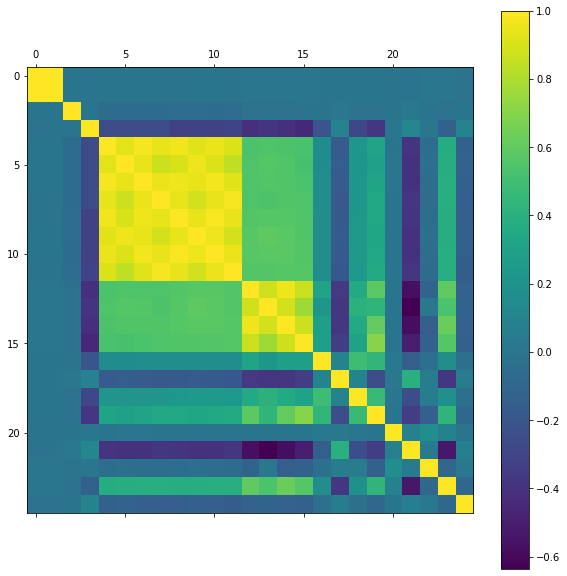

In [9]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10, 10))
plt.matshow(corr_mat, fignum=f.number)
plt.colorbar()

I think because I assume the Nan values are 0 so there is near zero correlation with Expected.

In the Expected column, the mean is about 106, but 75% of the data is lower than 3.8, and the max is 33017. Our data has a lot of outliers. Let's plot them~!

In [10]:
train["Expected"].unique()

array([2.54000130e-01, 1.01600050e+00, 2.61620140e+01, 4.06400200e+00,
       7.74700440e+02, 5.08000250e-01, 3.22500180e+00, 1.82880100e+01,
       1.00000050e-02, 2.54000140e+00, 3.30200170e+00, 1.27000070e+00,
       2.28600120e+00, 1.30810070e+03, 6.00000360e-02, 1.52400080e+00,
       3.81000200e+00, 2.80000130e+01, 1.66370090e+02, 1.07500060e+00,
       3.55600200e+00, 2.79400130e+00, 7.87400440e+00, 4.31800200e+00,
       2.97662770e+03, 7.62000400e-01, 1.10642460e+03, 1.98450300e+03,
       1.47320080e+01, 1.80898900e+03, 3.00000180e-02, 2.50012330e+03,
       3.16484160e+02, 1.51384080e+02, 1.40000070e+01, 2.90000170e-01,
       1.42500070e+00, 8.76300500e+02, 3.50000170e-01, 8.89000500e+00,
       8.63600400e+00, 5.17999270e+02, 1.77800100e+00, 6.09600300e+00,
       3.04800150e+00, 3.95000220e+00, 9.90600600e+00, 2.38760130e+01,
       2.03200100e+00, 4.51510640e+03, 4.57200240e+00, 1.24460070e+01,
       5.58800270e+00, 7.62000400e+00, 1.14300060e+01, 5.84200300e+00,
      

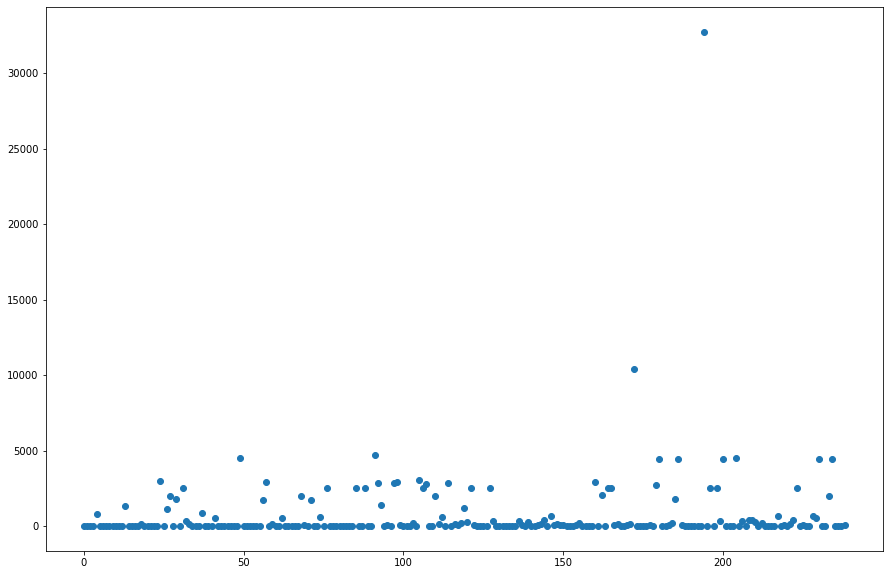

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.scatter(np.arange(len(train["Expected"].unique())), train["Expected"].unique())

(array([229.,   8.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000050e-02, 3.27407070e+03, 6.54813140e+03, 9.82219210e+03,
        1.30962528e+04, 1.63703135e+04, 1.96443742e+04, 2.29184349e+04,
        2.61924956e+04, 2.94665563e+04, 3.27406170e+04]),
 <a list of 10 Patch objects>)

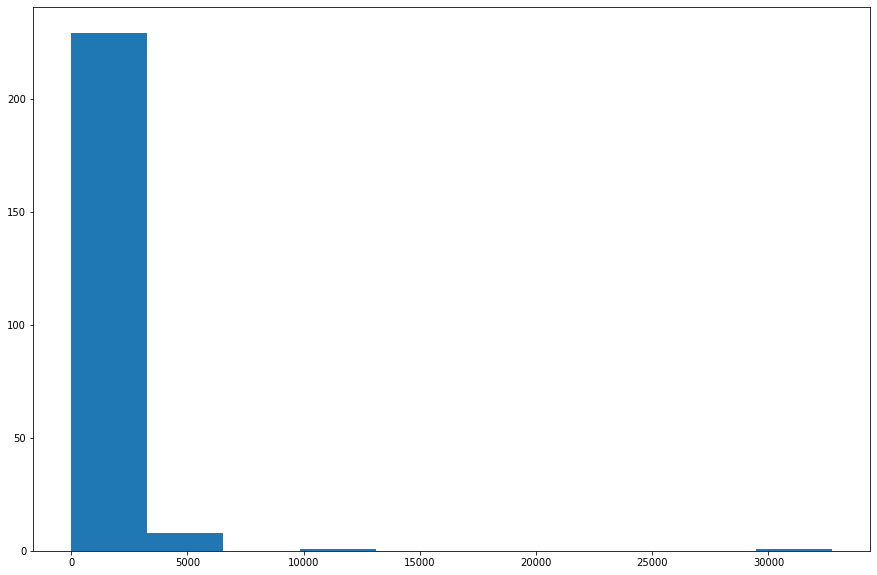

In [12]:
plt.figure(figsize=(15, 10))
plt.hist(train["Expected"].unique())

Now let's exclude the outliers. We will use scipy.stats.precentileofscore to calculate the percentile of a given number in the column. Let's try with mean.

In [13]:
from scipy import stats

print(stats.percentileofscore(train["Expected"], 73))

91.338


92% of the data is lower than 110, which is about .367M rows, while our data has 4588400 rows. Let's exlude the outliers

In [5]:
train.drop(train[train["Expected"] >= 73].index, inplace=True)
train

,Unnamed: 0,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,0,1,3,10.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
1,1,1,16,10.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
2,2,1,25,10.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
3,3,1,35,10.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
4,4,1,45,10.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,4776,13,16.000,17.000,0.000,18.500,23.000,17.000,16.500,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.050
49996,49996,4776,18,16.000,0.000,0.000,0.000,19.500,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.050
49997,49997,4776,23,16.000,0.000,0.000,0.000,15.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.050
49998,49998,4776,29,16.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.050


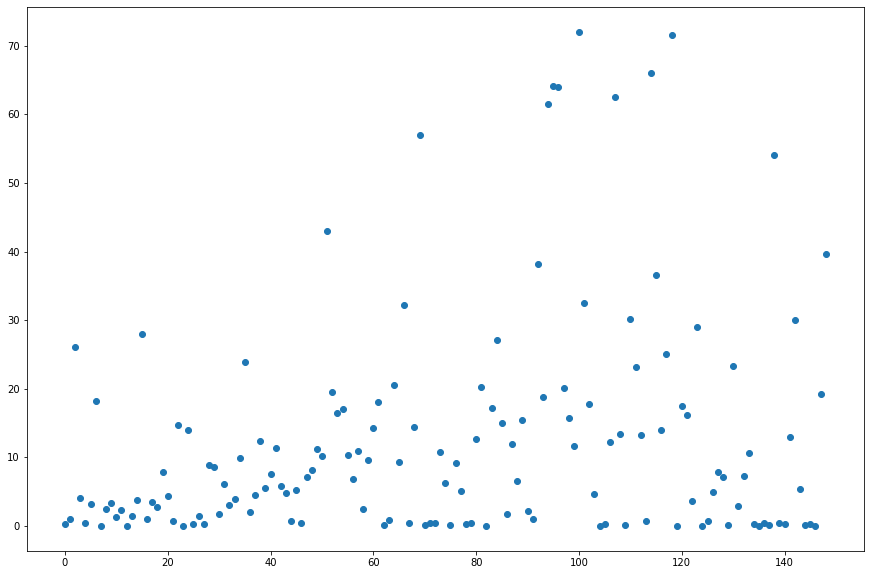

In [15]:
plt.figure(figsize=(15, 10))
plt.scatter(np.arange(len(train["Expected"].unique())), train["Expected"].unique())

(array([76., 29., 19.,  7.,  5.,  4.,  0.,  2.,  4.,  3.]),
 array([1.0000005e-02, 7.2090040e+00, 1.4408008e+01, 2.1607012e+01,
        2.8806016e+01, 3.6005020e+01, 4.3204024e+01, 5.0403028e+01,
        5.7602032e+01, 6.4801036e+01, 7.2000040e+01]),
 <a list of 10 Patch objects>)

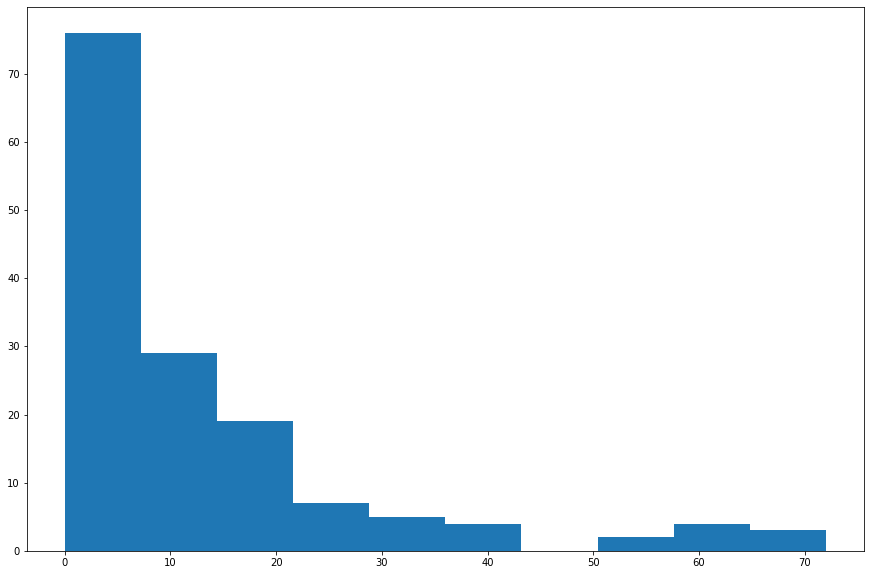

In [16]:
plt.figure(figsize=(15, 10))
plt.hist(train["Expected"].unique())

Our data looks good now. I think someone measured the outliers on stormy days.

Now let's use Seaborn's pairplot to see the relations between variables, but let's select only specific values.

Now we begin processing the data into time series data. The time series is the minutes_past column.

In [6]:
train_grouped = train.groupby('Id')
target = pd.DataFrame(train_grouped['Expected'].mean()) # mean, or any value, since they are the same in a group

In [7]:
MAX_SEQ_LEN = train_grouped.size().max() #maximum possible length of a query
MAX_SEQ_LEN

19

Up to 19 radar records are given per hourly rain gauge reading (and as few as a single record); interestingly the number of radar measurements provided should itself contain some information on the rainfall levels as it is apparently not uncommon for meteorologists to request multiple radar sweeps when there are fast-moving storms.

http://simaaron.github.io/Estimating-rainfall-from-weather-radar-readings-using-recurrent-neural-networks/

In [19]:
target

,Expected
Id,
1,0.254
2,1.016
3,26.162
4,4.064
6,0.254
...,...
4772,18.288
4773,0.254
4774,26.162


In [8]:
target.reset_index(inplace=True)
target = target["Expected"]
target

0       0.254
1       1.016
2      26.162
3       4.064
4       0.254
        ...  
4314   18.288
4315    0.254
4316   26.162
4317   14.000
4318    0.050
Name: Expected, Length: 4319, dtype: float64

In [9]:
train_size = len(train_grouped) #or len(target)
train_size

4319

In [10]:
N_FEATURES = 22
X_train = np.zeros((train_size, MAX_SEQ_LEN, N_FEATURES), dtype=np.float32)
y_train = np.zeros(train_size, dtype=np.float32)

In [11]:
i = 0
for _, group in train_grouped:
    X = group.values
    seq_len = X.shape[0]
    X_train[i,:seq_len,:] = X[:,1:23]
    y_train[i] = X[0,23]
    i += 1
    del X
    
del train_grouped
X_train.shape, y_train.shape

((4319, 19, 22), (4319,))

In [24]:
test = pd.read_csv("/home/gauravkai018352/cloudxlab_jupyter_notebooks/test.zip")

In [25]:
test.shape

(8022756, 23)

In [26]:
df = train.iloc[:10000,]

In [27]:
df.to_csv('test_rain.csv')

In [12]:
test = pd.read_csv('test_rain.csv')

In [29]:
test.

,Unnamed: 0,Unnamed: 0.1,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,0,0,1,3,10.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
1,1,1,1,16,10.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
2,2,2,1,25,10.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
3,3,3,1,35,10.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
4,4,4,1,45,10.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11005,11005,1038,25,11.000,0.000,0.000,0.000,0.000,0.000,...,1.052,0.938,0.000,-1.000,2.250,-0.710,0.000,0.000,2.690,0.254
9996,11006,11006,1038,30,11.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
9997,11007,11007,1038,39,11.000,16.000,0.000,10.500,20.500,22.000,...,1.012,0.938,0.312,0.812,1.438,-3.170,-3.170,-0.350,3.880,0.254
9998,11008,11008,1038,48,11.000,8.000,0.000,12.000,33.500,8.000,...,1.002,0.875,0.312,0.875,2.312,0.350,-2.820,0.710,2.820,0.254


In [13]:
test.drop(test.iloc[:, 0:2], inplace = True, axis = 1)

In [14]:
test

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
1,1,16,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
2,1,25,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
3,1,35,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
4,1,45,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1038,25,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.052,0.938,0.000,-1.000,2.250,-0.710,0.000,0.000,2.690,0.254
9996,1038,30,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
9997,1038,39,11.000,16.000,0.000,10.500,20.500,22.000,0.000,13.500,...,1.012,0.938,0.312,0.812,1.438,-3.170,-3.170,-0.350,3.880,0.254
9998,1038,48,11.000,8.000,0.000,12.000,33.500,8.000,0.000,12.000,...,1.002,0.875,0.312,0.875,2.312,0.350,-2.820,0.710,2.820,0.254


In [15]:
test.isna().sum()

Id                       0
minutes_past             0
radardist_km             0
Ref                      0
Ref_5x5_10th             0
Ref_5x5_50th             0
Ref_5x5_90th             0
RefComposite             0
RefComposite_5x5_10th    0
RefComposite_5x5_50th    0
RefComposite_5x5_90th    0
RhoHV                    0
RhoHV_5x5_10th           0
RhoHV_5x5_50th           0
RhoHV_5x5_90th           0
Zdr                      0
Zdr_5x5_10th             0
Zdr_5x5_50th             0
Zdr_5x5_90th             0
Kdp                      0
Kdp_5x5_10th             0
Kdp_5x5_50th             0
Kdp_5x5_90th             0
Expected                 0
dtype: int64

In [16]:
test_grouped = test.groupby('Id')
target1 = pd.DataFrame(test_grouped['Expected'].mean())

In [17]:
test_size = len(test_grouped)

In [18]:
X_test = np.zeros((test_size, MAX_SEQ_LEN, N_FEATURES), dtype=np.float32)
y_test = np.zeros(test_size, dtype=np.float32)

In [19]:
X_test.shape

(936, 19, 22)

In [53]:
from tensorflow.keras.layers import (
    Input,
    Dense,
    LSTM,
    AveragePooling1D,
    TimeDistributed,
    Flatten,
    Bidirectional,
    Dropout
)
from tensorflow.keras.models import Model

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X_train, target, random_state=42, shuffle=True)

In [44]:
#Convert into tf.data.Dataset to avoid Out of memory while training, and delete unused variables.
import tensorflow as tf
del X_train
del target

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
train_data = train_data.batch(32)
valid_data = valid_data.batch(32)

del x_train
del x_valid
del y_train
del y_valid

In [54]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_delta=0.01)

In [55]:
def get_model_deep(shape=(19, 22)):
    inp = Input(shape)
    x = Dense(16)(inp)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = TimeDistributed(Dense(64))(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = TimeDistributed(Dense(1))(x)
    x = AveragePooling1D()(x)
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(1)(x)

    model = Model(inp, x)
    return model

In [56]:
model = get_model_deep((19,22))
model.compile(optimizer='adam', loss='mae',)
model.summary()

W0623 11:18:16.668166 140713452427072 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0623 11:18:16.720761 140713452427072 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0623 11:18:16.722537 140713452427072 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Orthogonal.__init__ (from tensorflo

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19, 22)]          0         
_________________________________________________________________
dense (Dense)                (None, 19, 16)            368       
_________________________________________________________________
bidirectional (Bidirectional (None, 19, 128)           41472     
_________________________________________________________________
time_distributed (TimeDistri (None, 19, 64)            8256      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 19, 256)           197632    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 19, 1)             257       
_________________________________________________________________
average_pooling1d (AveragePo (None, 9, 1)              0     

In [57]:
history = model.fit(train_data, epochs=100, validation_data=valid_data,
          callbacks=[early_stopping, reduce_lr])

W0623 11:18:23.981356 140713452427072 training_utils.py:1300] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.


Epoch 1/100
102/102 [==============================] - 14s 140ms/step - loss: 2.4761 - val_loss: 2.6759
Epoch 2/100
102/102 [==============================] - 10s 98ms/step - loss: 2.4304 - val_loss: 2.6764
Epoch 3/100
102/102 [==============================] - 11s 109ms/step - loss: 2.4264 - val_loss: 2.6784
Epoch 4/100
102/102 [==============================] - 9s 93ms/step - loss: 2.3964 - val_loss: 2.6650
Epoch 5/100
102/102 [==============================] - 9s 92ms/step - loss: 2.3991 - val_loss: 2.6722
Epoch 6/100
102/102 [==============================] - 12s 119ms/step - loss: 2.3946 - val_loss: 2.6724
Epoch 7/100
102/102 [==============================] - 10s 100ms/step - loss: 2.3872 - val_loss: 2.6700
Epoch 8/100
102/102 [==============================] - 10s 102ms/step - loss: 2.3751 - val_loss: 2.6640
Epoch 9/100
102/102 [==============================] - 11s 108ms/step - loss: 2.3686 - val_loss: 2.6621
Epoch 10/100
102/102 [==============================] - 11s 109ms/ste

In [67]:
y_pred = model.predict(X_test)

ref: https://www.kaggle.com/aeryss/how-much-did-it-rain
        https://www.kaggle.com/andkul/deep-lstm-to-predict-rainfall